In [13]:
import numpy as np
import pandas as pd
import os

filename = '/Users/bell/in_and_outbox/2018/stabeno/ice_chukchi/coords_SChukchi.asc'
dfi = pd.read_csv(filename,sep=',')

In [32]:
directory = '/Users/bell/in_and_outbox/2018/stabeno/ice_chukchi/ssmi_ice_for_shaun/merged/'

#subset the data
for filename in sorted(os.listdir(directory)):
    if filename.endswith(".asc2"):
        df = pd.read_csv(directory+filename,names=['lat','lon','ice','count'],sep='\s+')
        #(df.iloc[dfi.findex.values]).to_csv(directory+filename.replace(".asc2",".subset.asc2"))
        #(df.iloc[dfi.findex.values]['ice']).to_frame().T.to_csv('coords_SChukchi_noland.asc',mode='a')
        (df.iloc[dfi.findex.values]['ice']).to_frame().mean().to_csv('coords_SChukchi_noland_mean.asc',mode='a+')
    else:
        continue

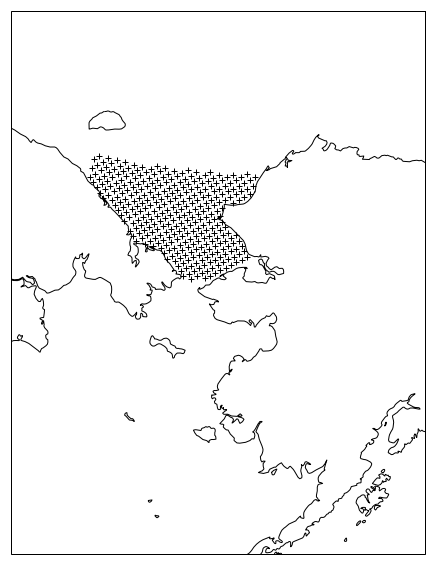

In [17]:
#%%#using Cartopy for mapping
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io import shapereader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

def erddap_etopo1():
    """get subset of etopo1 data from erddap"""
    
    urllib.urlretrieve("http://coastwatch.pfeg.noaa.gov/erddap/griddap/etopo180.nc?altitude[(65):1:(75)][(-170):1:(-155)]","data/etopo1_tmp.nc")
    
def etopo1_subset(file='etopo1.nc', region=None):
    """ read in ardemV2 topography/bathymetry. """
    
    bathydata = Dataset(file)
    
    topoin = bathydata.variables['altitude'][:]
    lons = bathydata.variables['longitude'][:]
    lats = bathydata.variables['latitude'][:]
    bathydata.close()
    
    return(topoin, lats, lons)

def make_map(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(10, 10),
                           subplot_kw=dict(projection=projection))
    if projection == ccrs.PlateCarree():
        gl = ax.gridlines(draw_labels=True)
        gl.xlabels_top = gl.ylabels_right = False
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='1.0')

#%%
### Plot location of sample points
extent = [180, 210, 55, 75]
projection=ccrs.LambertConformal(central_longitude=200.0)
transformation=ccrs.PlateCarree()
fig,ax = make_map(projection=projection)

ax.plot(dfi.lon.values,dfi.lat.values,'k+',transform=transformation)
ax.add_feature(land_50m)
ax.coastlines(resolution='50m')
ax.set_extent(extent)

In [79]:
data = pd.read_csv('/Users/bell/in_and_outbox/2018/stabeno/ice_chukchi/through_2018_NRT/coords_SChukchi_noland_mean.csv',
                  parse_dates=True, index_col='datetime')

In [84]:
data.resample('D').mean().interpolate('linear',limit=1).to_csv('/Users/bell/in_and_outbox/2018/stabeno/ice_chukchi/through_2018_NRT/coords_SChukchi_noland_mean.daily.csv')